# A2 - Linear regression, Logistic Regression and KNN classifier
### Martin Hansson

# Question 1

Data of selling prices with respect to several other variables for villas in Landvetter are imported from _data_assignment2.csv_. In the table below a correlation matrix is
printed to see how variables variate with each other. The table shows that _Selling price_ correlate strongest with _Living area_, _Rooms_ and _Age_.

In [ ]:
# Start writing code here...import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from matplotlib.ticker import FuncFormatter
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
# Turn off warnings for chained assignments
pd.options.mode.chained_assignment = None 


# Help function for the y-axis
def mill(x, pos):
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(mill)

# Read the data file
raw_data = pd.read_csv('data_assignment2.csv')
raw_data.corr()





,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
ID,1.000000,0.241464,0.082492,-0.068063,-0.049873,-0.285319,0.126701
Living_area,0.241464,1.000000,0.799980,-0.019801,-0.390847,-0.422667,0.561956
Rooms,0.082492,0.799980,1.000000,-0.041815,-0.203919,-0.327568,0.415535
Land_size,-0.068063,-0.019801,-0.041815,1.000000,0.318797,0.429919,-0.118868
Biarea,-0.049873,-0.390847,-0.203919,0.318797,1.000000,0.292421,-0.267396
Age,-0.285319,-0.422667,-0.327568,0.429919,0.292421,1.000000,-0.481619
Selling_price,0.126701,0.561956,0.415535,-0.118868,-0.267396,-0.481619,1.000000


## 1a
Variables not used for the assignment were removed and a new variable called _Total_area_ were created, 
which is the sum of _Living_area_ and _Biarea_. Since not all houses have a _Biarea_, the _Total_area_ replaced with _Living area_ 
if it did not exist. This was done to check if _Selling prices_ correlate stronger to _Total area_ then _Living area_. However, this resulted in
weak correlation of 0.36 (see below) compared to 0.56 for _Living area_.

A linear regression model for _Selling price_/_Living area_ were established. The resulting regression plot is found below.

In [ ]:
%matplotlib inline

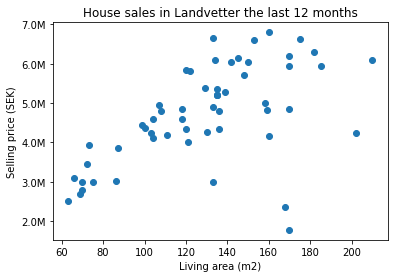

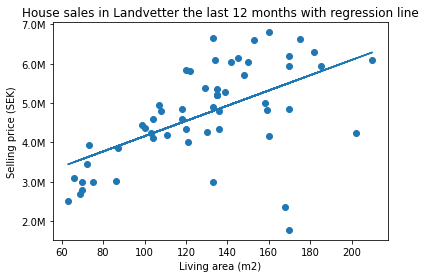

,ID,Living_area,Selling_price,Total_area
ID,1.000000,0.241464,0.126701,0.220428
Living_area,0.241464,1.000000,0.561956,0.658529
Selling_price,0.126701,0.561956,1.000000,0.348229
Total_area,0.220428,0.658529,0.348229,1.000000


In [ ]:

# Drop columns not needed
house_data = raw_data.drop(['Rooms', 'Land_size', 'Age'], axis =1)

# Calculate and add the Total_area column
house_data['Total_area'] = house_data['Living_area'] + house_data['Biarea']
house_data['Total_area'].fillna(house_data['Living_area'], inplace = True)
house_data.drop(['Biarea'], axis =1, inplace = True)


# Plot the data
fig, ax = plt.subplots()
plt.scatter(x = house_data.Living_area, y = house_data.Selling_price)
plt.title("House sales in Landvetter the last 12 months")
plt.xlabel("Living area (m2)") 
plt.ylabel("Selling price (SEK)")
plt.ticklabel_format(axis = 'y', style = 'plain')
ax.yaxis.set_major_formatter(formatter)
plt.show()


# Calculate the regression line
attributes = house_data[['Living_area']]
lables = house_data['Selling_price']
model = LinearRegression().fit(attributes, lables)

# Plot the data with the regression lina
fig, ax = plt.subplots()
plt.scatter(x = house_data.Living_area, y = house_data.Selling_price)
plt.plot(attributes, model.predict(attributes))
plt.title("House sales in Landvetter the last 12 months with regression line")
plt.xlabel("Living area (m2)") 
plt.ylabel("Selling price (SEK)")
plt.ticklabel_format(axis = 'y', style = 'plain')
ax.yaxis.set_major_formatter(formatter)
plt.show()
house_data.corr()

## 1b
The slope came out to be 19370 SEK/m2 and the intercept 2220603 sek

In [ ]:
# print the slope and intercept
print('The slope of our regression line is: '"%.0f" % model.coef_[0] + ' SEK/m2')
print('The Intercept of our regression line is : '"%.0f" % model.intercept_ + ' SEK')


The slope of our regression line is: 19370 SEK/m2
The Intercept of our regression line is : 2220603 SEK


## 1c
Here we let our model predict the selling price for houses according to the question.
Our result were:

100 m2 house: approximately 4.2 million SEK

150 m2 house: approximately 5.1 million SEK

200 m2 house: approximately 6.1 million SEK


In [ ]:
# Print the predictions
print('Our Model predicts the price of a 100 m2 house to: ' + "{:,.0f}".format(model.predict([[100]])[0]).replace(',', ' ') + ' SEK')
print('Our Model predicts the price of a 150 m2 house to: ' + "{:,.0f}".format(model.predict([[150]])[0]).replace(',', ' ') + ' SEK')
print('Our Model predicts the price of a 200 m2 house to: ' + "{:,.0f}".format(model.predict([[200]])[0]).replace(',', ' ') + ' SEK')

Our Model predicts the price of a 100 m2 house to: 4 157 617 SEK
Our Model predicts the price of a 150 m2 house to: 5 126 124 SEK
Our Model predicts the price of a 200 m2 house to: 6 094 631 SEK


## 1d
The residual plot is shown in the figure below. It shows the the error for the data point w.r.t. the regression line, i.e. the
distance between the line and the data points in the figure above.

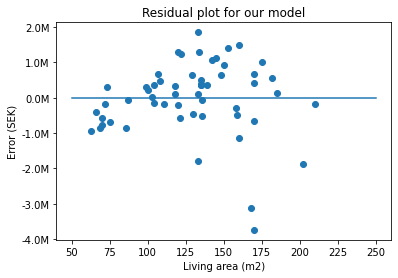

In [ ]:
# Calculate the residuals
residuals = house_data.Selling_price - model.predict(attributes)

# Make the residual plot
fig, ax = plt.subplots()
plt.scatter(attributes ,residuals)
plt.plot([50,250], [0,0])
plt.title("Residual plot for our model")
plt.xlabel("Living area (m2)") 
plt.ylabel("Error (SEK)")
plt.ticklabel_format(axis = 'y', style = 'plain')
ax.yaxis.set_major_formatter(formatter)
plt.show()

## 1e
A wide spread of _Selling prices_ w.r.t. _Living area_ are noticed. With a correlation of 0.56, a single variable variable first order 
linear regression might not be the best model choice in this case. There are several ways to improve the model:

- Include more variables in a multivariate model. In this example the _Age_ and _Rooms_ would be good 
candidates since there a relatively high correlation to _Selling price_.
- Make a polynomial regression of higher order, _p_, to get a better fit. Increasing the order will always(!) lead to same or better fit (higher R^2-value) w.r.t. 
train data. But there are 2 important things to keep in mind. First; a better fit to train data does not necessarily improve prediction. This is especially true for 
overfitted models (i.e. too high order). To check the quality of the prediction, _prediction mean-squared-error_ (pMSE) can be computed. Second; it is always desirable
to keep the model complexity as low as possible w.r.t. performance. If pMSE is not significantly reduced when _p_ is increased (i.e. increased complexity), increasing _p_ 
should be avoided. This is referred to as _Occam's principle_ (go for the simplest model if two models have a similar predictive
performance).
- Remove outliers. In our example there are two outliers which one could argue if they should be removed.
Two houses with a _Living area_ of around 150 m2 and a price of less than 2.5 million. 
A model excluding these two outliers are shown in figure below and it it seems to give a more reasonable slope that fits the data better.



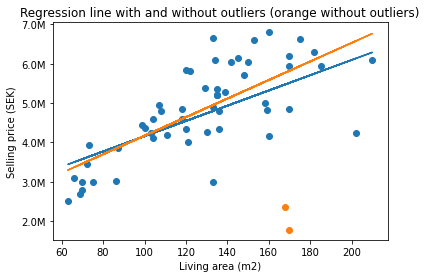

In [ ]:
# remove outliers 
house_data_without_outliers = house_data[(np.logical_not(np.logical_and(house_data.Selling_price < 3e6, house_data.Living_area > 160)))]

# Save the outliers for the plot
outliers = house_data[(np.logical_and(house_data.Selling_price < 3e6, house_data.Living_area > 160))]

# Train the model without outliers
attributes_without_outliers = house_data_without_outliers[['Living_area']]
lables_without_outliers = house_data_without_outliers['Selling_price']
model_without_outliers = LinearRegression().fit(attributes_without_outliers, lables_without_outliers)

# Make the plot with both models
fig, ax = plt.subplots()
plt.scatter(x = house_data_without_outliers.Living_area, y = house_data_without_outliers.Selling_price)
plt.scatter(x = outliers.Living_area, y = outliers.Selling_price)
plt.plot(attributes, model.predict(attributes))
plt.plot(attributes_without_outliers, model_without_outliers.predict(attributes_without_outliers))
plt.title("Regression line with and without outliers (orange without outliers)")
plt.xlabel("Living area (m2)") 
plt.ylabel("Selling price (SEK)")
plt.ticklabel_format(axis = 'y', style = 'plain')
ax.yaxis.set_major_formatter(formatter)
plt.plot()
plt.show()

# Train the model with the total area (Living area + biarea)
attributes = house_data[['Total_area']]
lables = house_data['Selling_price']
model = LinearRegression().fit(attributes, lables)




# Question 2

## Examining data set
Below is a plot were all variables (_sepal length_, _sepal width_, _petal length_ and _petal width_) are plotted against each other and color coded w.r.t. species. 
It can be seen that _versicolor_ and _virginica_ are quite similar while _setosa_ distinguish more from the others. It is resonable to believe that most of the
misclassification will occur between _versicolor_ and _virginica_.

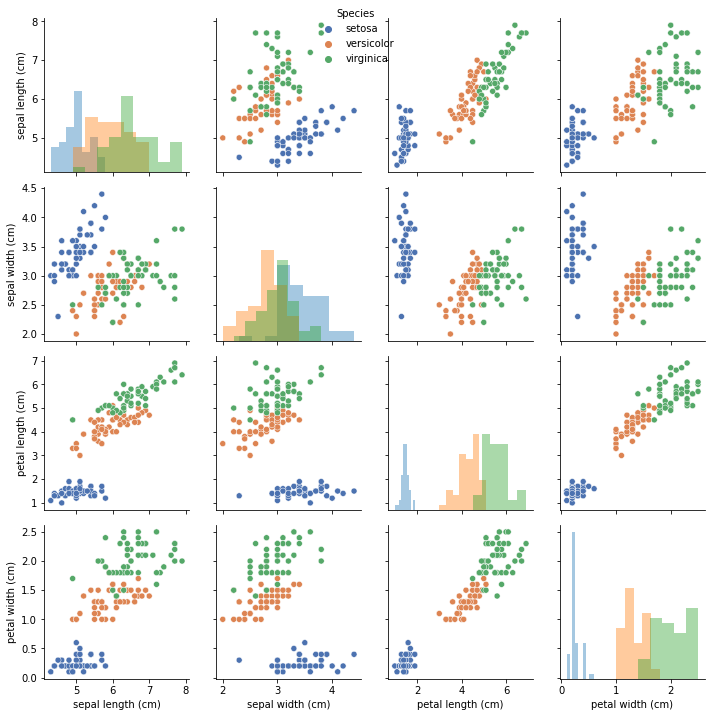

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

# Importing the dataset
iris = datasets.load_iris()
iris_DF = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
iris['target']

#Scatter plot of variables
g = sns.PairGrid(iris_DF, hue="target",hue_order = [0,1,2])
g.map_diag(sns.distplot,kde=False)
g.map_offdiag(sns.scatterplot,palette='deep')
g.add_legend(loc='upper center')

leg = g._legend
new_title = 'Species'
leg.set_title(new_title)
new_labels =['setosa', 'versicolor', 'virginica']
for t, l in zip(leg.texts, new_labels): t.set_text(l)



## 2a - Logistic regression and Confusion Matrix
A 3-class logistic regression based on all 4 variables (_sepal length_, _sepal width_, _petal length_ and _petal width_) are used as a model to 
classify the species of iris. The method of _one-vs-rest_ were used for in model. This means that one species at a time are compared to the rest. Then it is classified
as the (single) species with the highest probability. The python code below used the seed (random_state = 0) but in Exercise 2c the models are analyzed for different seeds.


In [ ]:
%matplotlib inline

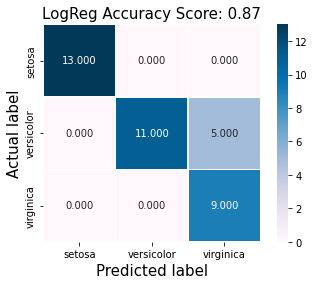

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns 

test_pr=0.25 #proportion of test set

# Splitting the dataset into the Training set and Test set
x = iris.data[:, :4] 
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_pr, random_state = 0)

# LOGISTIC REGRESSION ###############################
logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
logreg.fit(x_train, y_train)


#Predicting
y_pred = logreg.predict(x_test)

# Use the score method to get the accuracy of model
score = logreg.score(x_test, y_test)

#Creating confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(1);
labels=['setosa', 'versicolor', 'virginica'];
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuBu',xticklabels=labels,yticklabels=labels);
plt.ylabel('Actual label',size=15);
plt.xlabel('Predicted label',size=15);
plt.yticks(va="center");
all_sample_title = f'LogReg Accuracy Score: {score:.2f}';
plt.title(all_sample_title, size = 15);
plt.show();



It can be seen that, for the given model, 5 out of 38 test data point were classified as wrong species which give a score of 87%. 
As expected, all misclassifications were found between _versicolor_ and _virginica_. In this case all 5 misclassifications were _versicolor_ classified as _virginica_.
It is diffucult to say if this is a good model. It is highly depended of the use of the classification
but in general 87% seems to be a bad performance.

## 2b KNN model
Similar to question 2a, a 3-class classification model with 4 variables is established but with the KNN method. With this method, 
given the model parameter, _k_, the
iris will be classified based on the _k_ nearest neighbors. In the 2 variable case (using _uniform_ weights) this would correspond to drawing a larger and 
larger circle (and a sphere for 3 variable case) until 
it contains _k_ neighboring elements. Then it will be classified as the class having most elements in the circle. The _distance_ method will take into account the
distance from the element subjected to classification.

In this assignment, _training data_ will be represented by 75% of the data points and _test data_ by 25% for all calculation.

### Confusion Matrix based on KNN and uniform weights

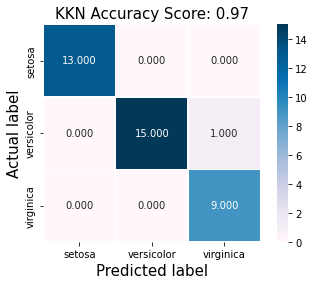

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11) #k=1,3,21

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_2 = knn.predict(x_test)

# Use the score method to get the accuracy of model
score_2 = metrics.accuracy_score(y_test, y_pred_2)

#Confusion matrix
cm_2 = metrics.confusion_matrix(y_test, y_pred_2)

plt.figure(2)
labels=['setosa', 'versicolor', 'virginica']
sns.heatmap(cm_2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuBu',xticklabels=labels,yticklabels=labels);
plt.ylabel('Actual label',size=15);
plt.xlabel('Predicted label',size=15);
plt.yticks(va="center")
all_sample_title = f'KKN Accuracy Score: {score_2:.2f}'
plt.title(all_sample_title, size = 15);

It can been seen that for the given train/test set combination, only 2 out of 38 iris were predicted wrong. As expeceted, all misclassifications were found between 
_versicolor_ and _virginica_. In this case, 1 _versicolor_ was misclassified as _virginica_ and one _virginica_ were misclassified as _versicolor_.

### Variation of k and weight method
In order to compare _distance_ vs _uniform_ and different k-values, 50 different seeds (i.e. different train/test sets) are used. Then the score is averaging over all
different test sets. Also the variation between different sets are recorded and plotted.

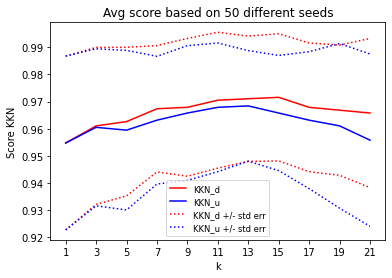

In [ ]:
k_val=range(1,23,2)
n_seeds=50
score_KKN_d=np.zeros(len(k_val))
score_KKN_u=np.zeros(len(k_val))
score_KKN_d_err=np.zeros(len(k_val))
score_KKN_u_err=np.zeros(len(k_val))
m=0
for k in range(1,23,2):
    score_d=np.zeros(n_seeds)
    score_u=np.zeros(n_seeds)
    for i in range(n_seeds):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_pr, random_state = i)
        knn_d = KNeighborsClassifier(n_neighbors=k,weights='distance')
        knn_u = KNeighborsClassifier(n_neighbors=k)
        knn_d.fit(x_train, y_train)
        knn_u.fit(x_train, y_train)
        score_d[i]=knn_d.score(x_test, y_test)
        score_u[i]=knn_u.score(x_test, y_test)
    score_KKN_d[m]=np.mean(score_d)
    score_KKN_u[m]=np.mean(score_u)
    score_KKN_d_err[m]=np.sqrt(np.var(score_d))
    score_KKN_u_err[m]=np.sqrt(np.var(score_u))
    m+=1
    

plt.figure(4)
plt.plot(k_val,score_KKN_d,color='red')
plt.plot(k_val,score_KKN_u,color='blue')
plt.plot(k_val,score_KKN_d+score_KKN_d_err,color='red',linestyle=':')
plt.plot(k_val,score_KKN_u+score_KKN_u_err,color='blue',linestyle=':')
plt.plot(k_val,score_KKN_d-score_KKN_d_err,color='red',linestyle=':')
plt.plot(k_val,score_KKN_u-score_KKN_u_err,color='blue',linestyle=':')
#plt.plot([0,21],[np.mean(score_LR),np.mean(score_LR)])
plt.ylabel('Score KKN');
plt.xlabel('k');
plt.title('Avg score based on '+str(n_seeds)+' different seeds');
plt.xticks(range(1,23,2))
plt.legend(['KKN_d','KKN_u','KKN_d +/- std err','KKN_u +/- std err'],fontsize='small');

The result shows that both KNN models (uniform and distance) performs best around k=13/15 and that the distance-method give higher accuracy than uniform-method. 
However, based on the standard errors, those differences are negligible since, i.e. their performance are much more dependent on the train/test set _"chosen"_ than
on the parameters/method itself. Low _k_ values will give an overfitted model and will have very good fit to training data but it not as good for 
predictions. If the _k_ value becomes too high, the model will be underfitted (.i.e. to coarse) and might not 
capture important details in the data.

## 2c - Logistic Regression vs KNN

From the confusion matrix in 2a and 2b, we clearly see that the KNN-model give us more accurate prediction. In order to further investigate the 
accuracy, different randomized test set are used (as in 2b). The score is averaged over 50 different train/test sets and 
also the variation of the results are taken into account. Now a good basis for comparison between the KNN (distance), KNN (uniform) 
for different k-values and the Logistic Regression is established. It can be seen that all the KNN-models performs
better, both in terms of mean score and less variation between different test sets.

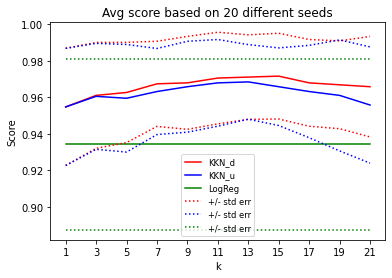

In [ ]:

n_seeds=20
score_LR=np.zeros(n_seeds)
#LOGREG
for i in range(n_seeds):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_pr, random_state = i)
    logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
    logreg.fit(x_train, y_train)
    score_LR[i]=logreg.score(x_test, y_test)
score_LR_m=np.mean(score_LR)
score_LR_err=np.sqrt(np.var(score_LR))

plt.figure(5)
plt.plot(k_val,score_KKN_d,color='red')
plt.plot(k_val,score_KKN_u,color='blue')
plt.plot(k_val,score_LR_m*np.ones(len(k_val)),color='green')
plt.plot(k_val,score_KKN_d+score_KKN_d_err,color='red',linestyle=':')
plt.plot(k_val,score_KKN_u+score_KKN_u_err,color='blue',linestyle=':')
plt.plot(k_val,(score_LR_m+score_LR_err)*np.ones(len(k_val)),color='green',linestyle=':')
plt.plot(k_val,score_KKN_d-score_KKN_d_err,color='red',linestyle=':')
plt.plot(k_val,score_KKN_u-score_KKN_u_err,color='blue',linestyle=':')
plt.plot(k_val,(score_LR_m-score_LR_err)*np.ones(len(k_val)),color='green',linestyle=':')
#plt.plot([0,21],[np.mean(score_LR),np.mean(score_LR)])
plt.ylabel('Score');
plt.xlabel('k');
plt.title('Avg score based on '+str(n_seeds)+' different seeds');
plt.xticks(range(1,23,2))
plt.legend(['KKN_d','KKN_u','LogReg','+/- std err','+/- std err','+/- std err'],fontsize='small');


# Question 3
It is important to use a separate test set to validate the prediction model. If the predictions made, would be part of the training data set, the model would be fitted
the predictions. The purpose of the model is to predict unknown y-values, given known x-values. In reality data points subjected to prediction cannot, of course, 
not be used to fit the model.